## Importing Packages

In [2]:
!pip install scikit-image scikit-learn

import numpy as np
import skimage.io
import skimage.transform
from scipy.sparse import spdiags, eye, csr_matrix
from scipy.sparse.linalg import eigsh
from skimage import io, color
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.util import img_as_float

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Defining Similarity & Degree Matrices

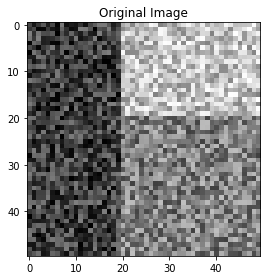

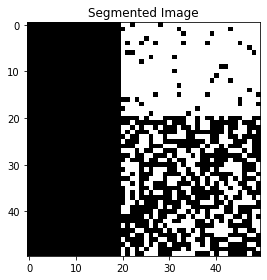

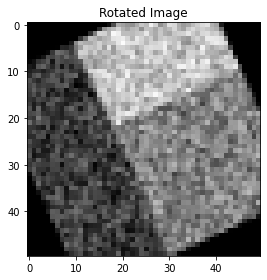

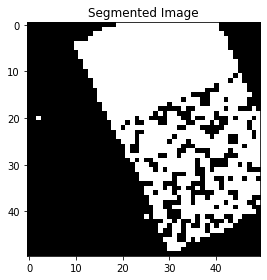

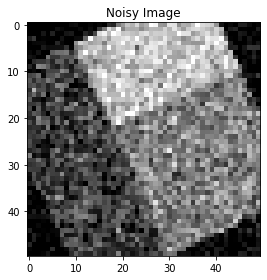

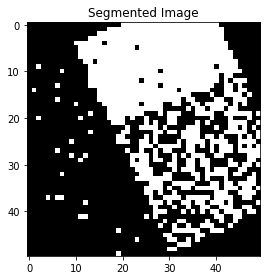

In [3]:


def create_similarity_matrix(img):
    """
    Creates a similarity matrix for an image based on the Euclidean distance between pixel intensities.
    """
    height, width = img.shape
    img_vector = img.reshape(-1, 1)
    # Compute pairwise Euclidean distances between pixels
    distance_matrix = np.sqrt((img_vector - img_vector.T)**2)
    # Convert distance matrix to similarity matrix
    sigma = np.mean(distance_matrix)
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

def create_degree_matrix(similarity_matrix):
    """
    Creates a degree matrix for a similarity matrix.
    """
    degree_vector = np.sum(similarity_matrix, axis=0)
    degree_matrix = spdiags(degree_vector, 0, len(degree_vector), len(degree_vector))
    return degree_matrix

def ncut_segmentation(img, k):
    """
    Performs N-cut image segmentation on a grayscale image using k clusters.
    """
    height, width = img.shape
    # Create similarity and degree matrices
    similarity_matrix = create_similarity_matrix(img)
    degree_matrix = create_degree_matrix(similarity_matrix)
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_matrix
    # Compute first k eigenvectors of the Laplacian matrix
    _, eigenvectors = eigsh(csr_matrix(laplacian_matrix), k=k, which='SM')
    # Normalize eigenvectors
    norm = np.linalg.norm(eigenvectors, axis=1)
    normalized_eigenvectors = eigenvectors / norm[:, np.newaxis]
    # Cluster eigenvectors using k-means
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_eigenvectors)
    labels = kmeans.labels_
    # Create segmented image
    segmented_img = np.zeros((height*width,))
    for i in range(k):
        segmented_img[labels == i] = i
    segmented_img = segmented_img.reshape((height, width))
    return segmented_img


# Load grayscale image
img = io.imread('/content/test1.png', as_gray=True)
plt.title("Original Image")
io.imshow(img)
plt.show()
# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
plt.show()


img = skimage.transform.rotate(img,25)
plt.title("Rotated Image")
io.imshow(img)
plt.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.util.random_noise(img, mode='gaussian')
plt.title("Noisy Image")
io.imshow(img)
io.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()



# Testing on TEST2.jpg (Original Image, Rotated Image, Noisy Image)

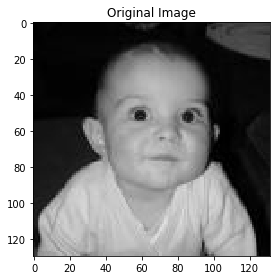

(130, 132)


<ipython-input-5-7a42eaac7aa4>:56: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)


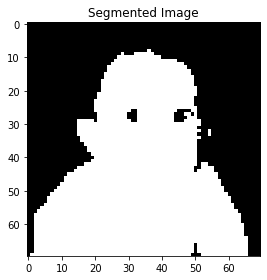

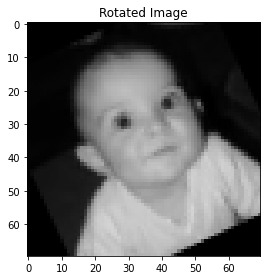

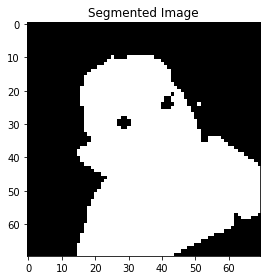

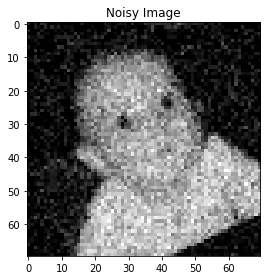

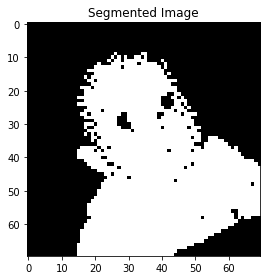

In [ ]:

def create_similarity_matrix(img):
    """
    Creates a similarity matrix for an image based on the Euclidean distance between pixel intensities.
    """
    height, width = img.shape
    img_vector = img.reshape(-1, 1)
    # Compute pairwise Euclidean distances between pixels
    distance_matrix = np.sqrt((img_vector - img_vector.T)**2)
    # Convert distance matrix to similarity matrix
    sigma = np.mean(distance_matrix)
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

def create_degree_matrix(similarity_matrix):
    """
    Creates a degree matrix for a similarity matrix.
    """
    degree_vector = np.sum(similarity_matrix, axis=0)
    degree_matrix = spdiags(degree_vector, 0, len(degree_vector), len(degree_vector))
    return degree_matrix

def ncut_segmentation(img, k):
    """
    Performs N-cut image segmentation on a grayscale image using k clusters.
    """
    height, width = img.shape
    # Create similarity and degree matrices
    similarity_matrix = create_similarity_matrix(img)
    degree_matrix = create_degree_matrix(similarity_matrix)
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_matrix
    # Compute first k eigenvectors of the Laplacian matrix
    _, eigenvectors = eigsh(csr_matrix(laplacian_matrix), k=k, which='SM')
    # Normalize eigenvectors
    norm = np.linalg.norm(eigenvectors, axis=1)
    normalized_eigenvectors = eigenvectors / norm[:, np.newaxis]
    # Cluster eigenvectors using k-means
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_eigenvectors)
    labels = kmeans.labels_
    # Create segmented image
    segmented_img = np.zeros((height*width,))
    for i in range(k):
        segmented_img[labels == i] = i
    segmented_img = segmented_img.reshape((height, width))
    return segmented_img


# Load grayscale image
img = io.imread('/content/test2.jpg', as_gray=True)
plt.title("Original Image")
io.imshow(img)
plt.show()
print(img.shape)

img = rgb2gray(img)
img = resize(img,(70,70))



# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.transform.rotate(img,25)
plt.title("Rotated Image")
io.imshow(img)
plt.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.util.random_noise(img, mode='gaussian')
plt.title("Noisy Image")
io.imshow(img)
io.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()








# Testing on Test3.jpg (Original Image, Rotated Image, Noisy Image)

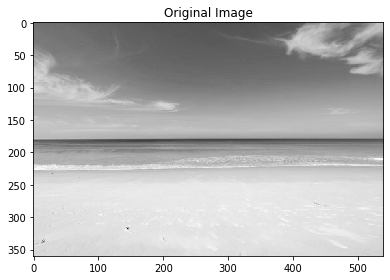

(360, 540)


<ipython-input-6-421e8a56540b>:56: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)


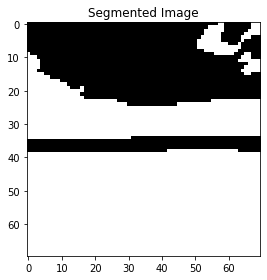

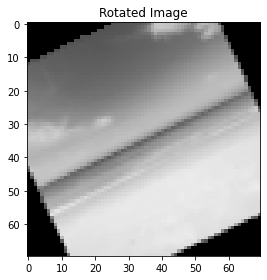

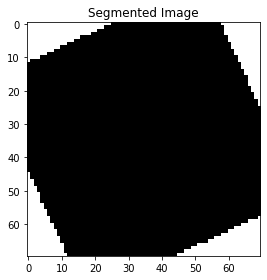

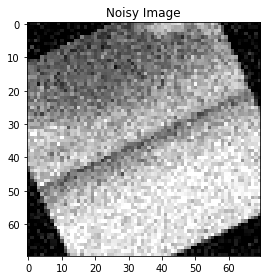

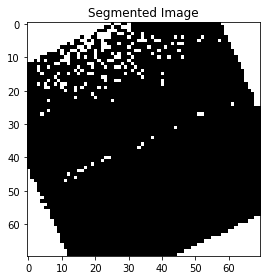

In [ ]:


def create_similarity_matrix(img):
    """
    Creates a similarity matrix for an image based on the Euclidean distance between pixel intensities.
    """
    height, width = img.shape
    img_vector = img.reshape(-1, 1)
    # Compute pairwise Euclidean distances between pixels
    distance_matrix = np.sqrt((img_vector - img_vector.T)**2)
    # Convert distance matrix to similarity matrix
    sigma = np.mean(distance_matrix)
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

def create_degree_matrix(similarity_matrix):
    """
    Creates a degree matrix for a similarity matrix.
    """
    degree_vector = np.sum(similarity_matrix, axis=0)
    degree_matrix = spdiags(degree_vector, 0, len(degree_vector), len(degree_vector))
    return degree_matrix

def ncut_segmentation(img, k):
    """
    Performs N-cut image segmentation on a grayscale image using k clusters.
    """
    height, width = img.shape
    # Create similarity and degree matrices
    similarity_matrix = create_similarity_matrix(img)
    degree_matrix = create_degree_matrix(similarity_matrix)
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_matrix
    # Compute first k eigenvectors of the Laplacian matrix
    _, eigenvectors = eigsh(csr_matrix(laplacian_matrix), k=k, which='SM')
    # Normalize eigenvectors
    norm = np.linalg.norm(eigenvectors, axis=1)
    normalized_eigenvectors = eigenvectors / norm[:, np.newaxis]
    # Cluster eigenvectors using k-means
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_eigenvectors)
    labels = kmeans.labels_
    # Create segmented image
    segmented_img = np.zeros((height*width,))
    for i in range(k):
        segmented_img[labels == i] = i
    segmented_img = segmented_img.reshape((height, width))
    return segmented_img


# Load grayscale image
img = io.imread('/content/test3.jpg', as_gray=True)
plt.title("Original Image")
io.imshow(img)
plt.show()
print(img.shape)

img = rgb2gray(img)
img = resize(img,(70,70))



# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.transform.rotate(img,25)
plt.title("Rotated Image")
io.imshow(img)
plt.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.util.random_noise(img, mode='gaussian')
plt.title("Noisy Image")
io.imshow(img)
io.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()









# Testing on Test4.jpg (Original Image, Rotated Image, Noisy Image)

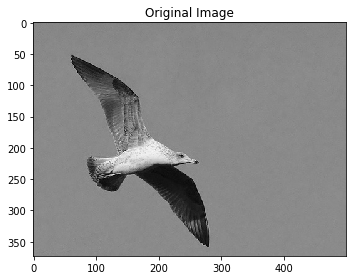

(373, 500)


<ipython-input-7-b0cd857be3e1>:56: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)


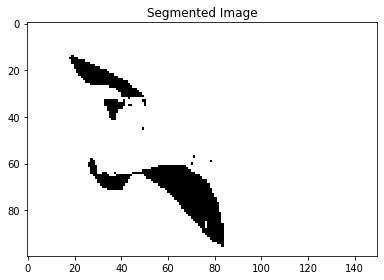

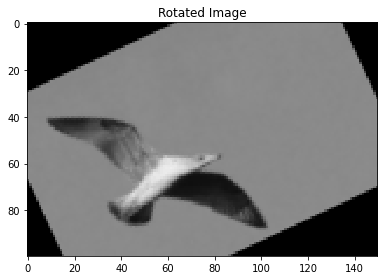

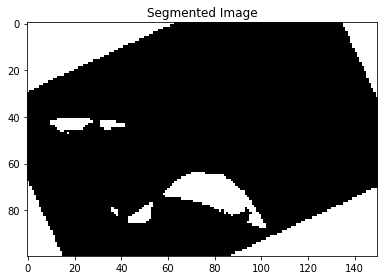

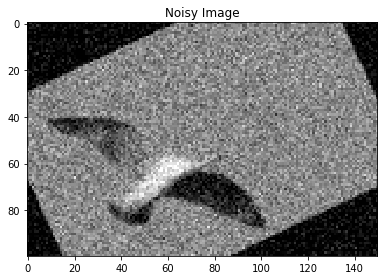

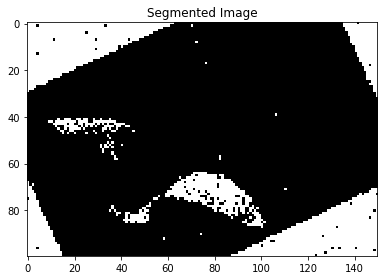

In [ ]:


def create_similarity_matrix(img):
    """
    Creates a similarity matrix for an image based on the Euclidean distance between pixel intensities.
    """
    height, width = img.shape
    img_vector = img.reshape(-1, 1)
    # Compute pairwise Euclidean distances between pixels
    distance_matrix = np.sqrt((img_vector - img_vector.T)**2)
    # Convert distance matrix to similarity matrix
    sigma = np.mean(distance_matrix)
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

def create_degree_matrix(similarity_matrix):
    """
    Creates a degree matrix for a similarity matrix.
    """
    degree_vector = np.sum(similarity_matrix, axis=0)
    degree_matrix = spdiags(degree_vector, 0, len(degree_vector), len(degree_vector))
    return degree_matrix

def ncut_segmentation(img, k):
    """
    Performs N-cut image segmentation on a grayscale image using k clusters.
    """
    height, width = img.shape
    # Create similarity and degree matrices
    similarity_matrix = create_similarity_matrix(img)
    degree_matrix = create_degree_matrix(similarity_matrix)
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_matrix
    # Compute first k eigenvectors of the Laplacian matrix
    _, eigenvectors = eigsh(csr_matrix(laplacian_matrix), k=k, which='SM')
    # Normalize eigenvectors
    norm = np.linalg.norm(eigenvectors, axis=1)
    normalized_eigenvectors = eigenvectors / norm[:, np.newaxis]
    # Cluster eigenvectors using k-means
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_eigenvectors)
    labels = kmeans.labels_
    # Create segmented image
    segmented_img = np.zeros((height*width,))
    for i in range(k):
        segmented_img[labels == i] = i
    segmented_img = segmented_img.reshape((height, width))
    return segmented_img


# Load grayscale image
img = io.imread('/content/test4.jpg', as_gray=True)
plt.title("Original Image")
io.imshow(img)
plt.show()
print(img.shape)

img = rgb2gray(img)
img = resize(img,(100,150))



# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.transform.rotate(img,25)
plt.title("Rotated Image")
io.imshow(img)
plt.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.util.random_noise(img, mode='gaussian')
plt.title("Noisy Image")
io.imshow(img)
io.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()









# Testing on Test5.jpg (Original Image, Rotated Image, Noisy Image)

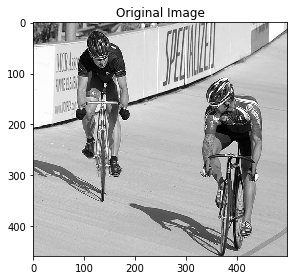

(459, 500)


<ipython-input-8-50ccd365fe7b>:56: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(img)


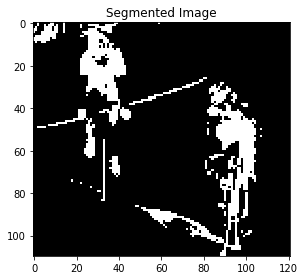

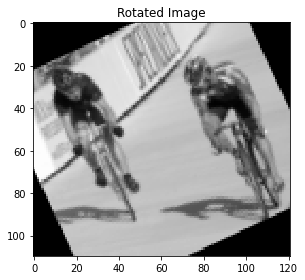

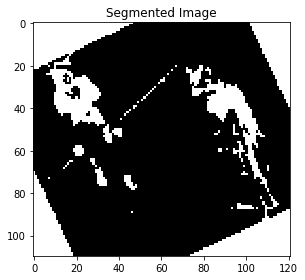

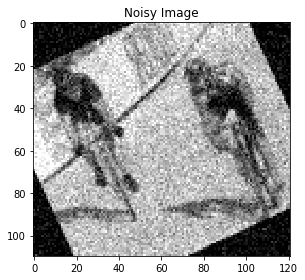

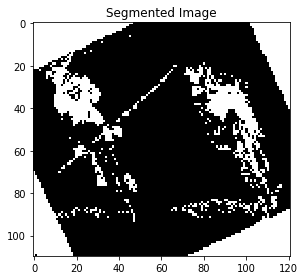

In [ ]:

def create_similarity_matrix(img):
    """
    Creates a similarity matrix for an image based on the Euclidean distance between pixel intensities.
    """
    height, width = img.shape
    img_vector = img.reshape(-1, 1)
    # Compute pairwise Euclidean distances between pixels
    distance_matrix = np.sqrt((img_vector - img_vector.T)**2)
    # Convert distance matrix to similarity matrix
    sigma = np.mean(distance_matrix)
    similarity_matrix = np.exp(-distance_matrix**2 / (2*sigma**2))
    return similarity_matrix

def create_degree_matrix(similarity_matrix):
    """
    Creates a degree matrix for a similarity matrix.
    """
    degree_vector = np.sum(similarity_matrix, axis=0)
    degree_matrix = spdiags(degree_vector, 0, len(degree_vector), len(degree_vector))
    return degree_matrix

def ncut_segmentation(img, k):
    """
    Performs N-cut image segmentation on a grayscale image using k clusters.
    """
    height, width = img.shape
    # Create similarity and degree matrices
    similarity_matrix = create_similarity_matrix(img)
    degree_matrix = create_degree_matrix(similarity_matrix)
    # Compute Laplacian matrix
    laplacian_matrix = degree_matrix - similarity_matrix
    # Compute first k eigenvectors of the Laplacian matrix
    _, eigenvectors = eigsh(csr_matrix(laplacian_matrix), k=k, which='SM')
    # Normalize eigenvectors
    norm = np.linalg.norm(eigenvectors, axis=1)
    normalized_eigenvectors = eigenvectors / norm[:, np.newaxis]
    # Cluster eigenvectors using k-means
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_eigenvectors)
    labels = kmeans.labels_
    # Create segmented image
    segmented_img = np.zeros((height*width,))
    for i in range(k):
        segmented_img[labels == i] = i
    segmented_img = segmented_img.reshape((height, width))
    return segmented_img


# Load grayscale image
img = io.imread('/content/test5.jpg', as_gray=True)
plt.title("Original Image")
io.imshow(img)
plt.show()
print(img.shape)

img = rgb2gray(img)
img = resize(img,(110,121))



# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.transform.rotate(img,25)
plt.title("Rotated Image")
io.imshow(img)
plt.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()

img = skimage.util.random_noise(img, mode='gaussian')
plt.title("Noisy Image")
io.imshow(img)
io.show()

# Perform N-cut segmentation with 2 clusters
segmented_img = ncut_segmentation(img, k=2)
# Display segmented image
plt.title("Segmented Image")
io.imshow(segmented_img)
io.show()







